# Bike Ride Share Data

In [1]:
# import libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

## Part 1: Data Exploration

In [2]:
# read in bike_share_hour.csv as a pandas dataframe.
# The columns are described in the bike_share_readme.txt if you need more information about them. 
# https://github.com/arjayit/cs4432_data/blob/master/bike_share_Readme.txt
url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv'
bikes = pd.read_csv(url)
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Look at the dataset and convert the columns that are categorical to a pandas "category" type.
categories = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']
for category in categories:
    bikes[category] = bikes[category].astype('category')

In [4]:
# Look for non-null values in the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(6), float64(4), int64(6), object(1)
memory usage: 1.6+ MB


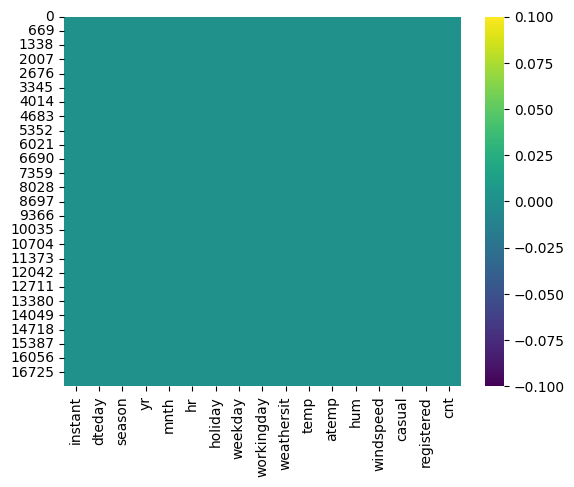

In [5]:
sns.heatmap(bikes.isnull(), cmap= 'viridis')
plt.show()

As can be seen in our numerical and visual heatmap inspection of the data, there are no null values.

In [6]:
bikes.mnth.value_counts()

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

In [7]:
# Do a descriptive analysis of the numeric columns
bikes.describe()

,instant,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# Implement code to figure out which months belong to which seasons.
bikes.groupby('season')['mnth'].unique()

season
1      [1, 2, 3, 12]
2       [3, 4, 5, 6]
3       [6, 7, 8, 9]
4    [9, 10, 11, 12]
Name: mnth, dtype: object

You should see that season definitions in the README file are not correct. According to the README file, the seasons are as follows:
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

However, based on what we observe above, the actual seasonal break down should be as follows:
- 1: Winter
- 2: Spring
- 3: Summer
- 4: Fall

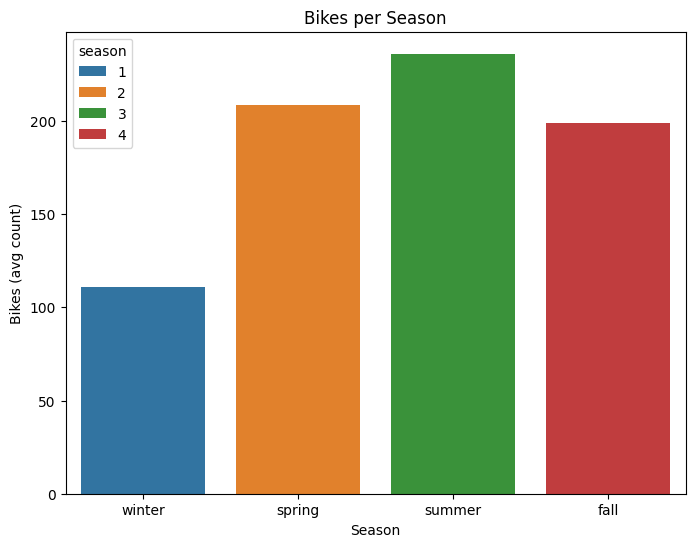

In [9]:
# Implement a bar plot of cnt vs season. Document which season has the most bike rides and which season has the least.
plt.figure(figsize= (8, 6), num= 1)
labels = ['winter', 'spring', 'summer', 'fall']
sns.barplot(data= bikes, x= 'season', y= 'cnt', hue= 'season', errorbar= None)
plt.xticks([0, 1, 2, 3], labels)
plt.title('Bikes per Season')
plt.xlabel('Season')
plt.ylabel('Bikes (avg count)')

plt.show()

Summer has the most bikes rides, while winter has the least amount of bike rides.

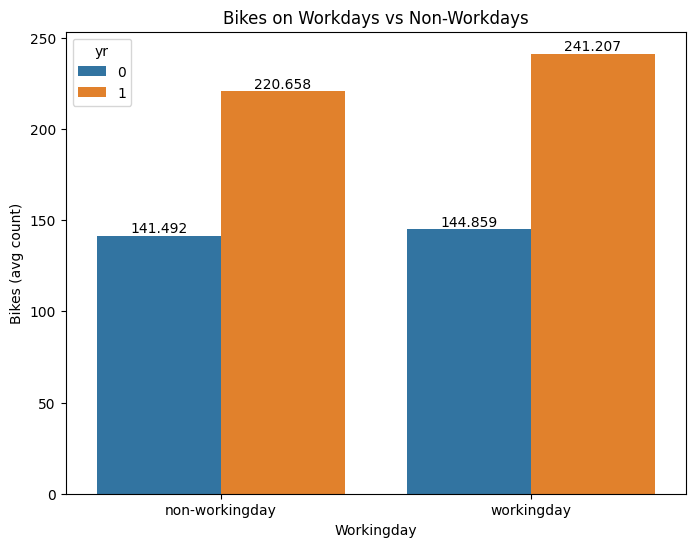

In [10]:
# Implement a bar chart for working day vs count. Document how bike rides are distributed across these two classes.
plt.figure(figsize= (8, 6), num= 2)

labels= ['non-workingday', 'workingday']
ax= sns.barplot(data= bikes, x= 'workingday', y= 'cnt', hue= 'yr', errorbar= None)
plt.xticks([0, 1], labels)
plt.title('Bikes on Workdays vs Non-Workdays')
plt.xlabel('Workingday')
plt.ylabel('Bikes (avg count)')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

The number of people renting bikes went up from 2011 (year 0) to 2012 (year 1), more so on workingdays than on non-workingdays. Non-workingday rentals and workingday rentals between the two years are actually fairly close in value (141.5 vs 144.9).

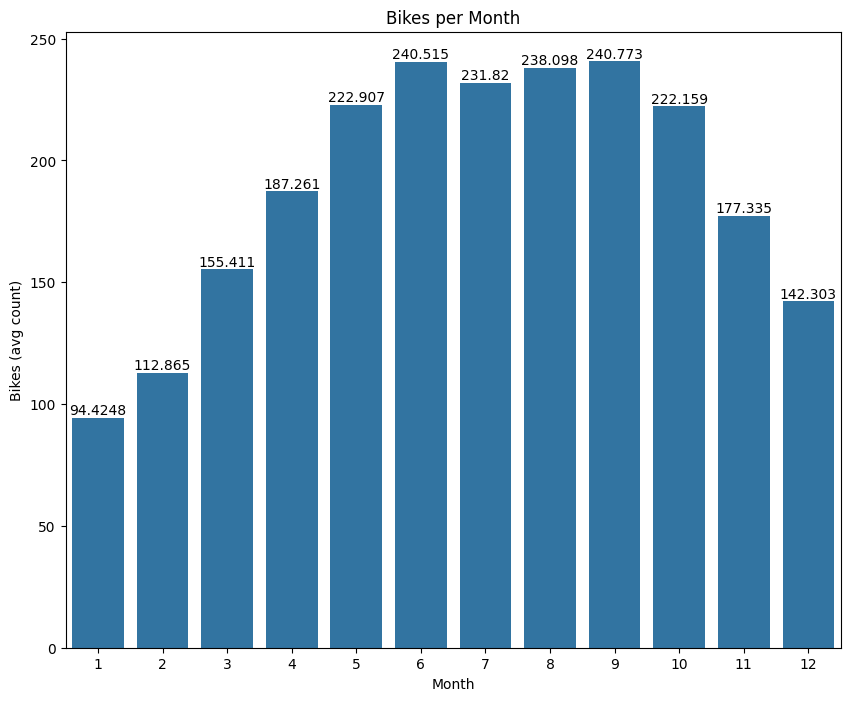

In [11]:
# Implement a bar chart for month vs count. Document which months have the most bike rides.
plt.figure(figsize= (10, 8), num= 3)

ax = sns.barplot(data= bikes, x= 'mnth', y= 'cnt', errorbar= None)
plt.title('Bikes per Month')
plt.xlabel('Month')
plt.ylabel('Bikes (avg count)')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [12]:
bike_cnt = bikes.groupby('mnth')['cnt'].mean().reset_index()
bike_cnt.query('cnt > 230').sort_values(by= 'cnt', ascending= False)

,mnth,cnt
8,9,240.773138
5,6,240.515278
7,8,238.097627
6,7,231.819892


The following months have the most bike rides:
- September
- June
- August

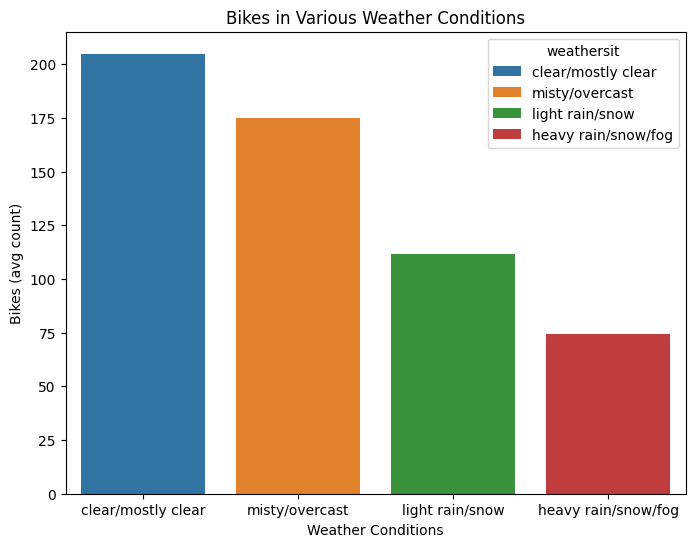

In [13]:
# Implement a bar plot of weathersit vs cnt. Document which weather situation has less bike rentals.
plt.figure(figsize= (8, 6), num= 4)

labels= ['clear/mostly clear', 'misty/overcast', 'light rain/snow', 'heavy rain/snow/fog']
g = sns.barplot(data= bikes, x= 'weathersit', y= 'cnt', hue= 'weathersit', errorbar= None)

plt.xticks([0, 1, 2, 3], labels)
plt.title('Bikes in Various Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Bikes (avg count)')
for t, l in zip(g.legend_.texts, labels):
    t.set_text(l)

plt.show()

Weather with heavy rain + ice pellets, thunderstorms, mist, snow and fog, (i.e. inclement bad weather) has less bike rentals compared to other weather conditions.

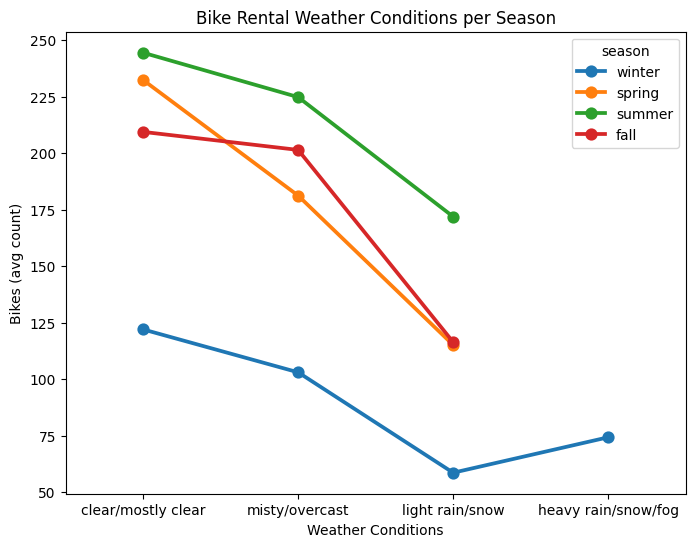

In [14]:
# Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue.
# Document how season and weathersit are related.
plt.figure(figsize= (8, 6), num= 5)

xlabels= ['clear/mostly clear', 'misty/overcast', 'light rain/snow', 'heavy rain/snow/fog']
legend_labels = ['winter', 'spring', 'summer', 'fall']

g = sns.pointplot(data= bikes, x= 'weathersit', y= 'cnt', hue= 'season', errorbar= None)

plt.title('Bike Rental Weather Conditions per Season')
plt.xticks([0, 1, 2, 3], labels)
plt.xlabel('Weather Conditions')
plt.ylabel('Bikes (avg count)')
for t, l in zip(g.legend_.texts, legend_labels):
    t.set_text(l)

plt.show()

Days with better weather (i.e., days that were clear/mostly clear) had higher bike rentals than days with increasingly worse weather.
Seasons with a higher content of "bad weather" days (i.e., winter and heavy/rain/snow/fog days) have a lower overall count of bike rentals.

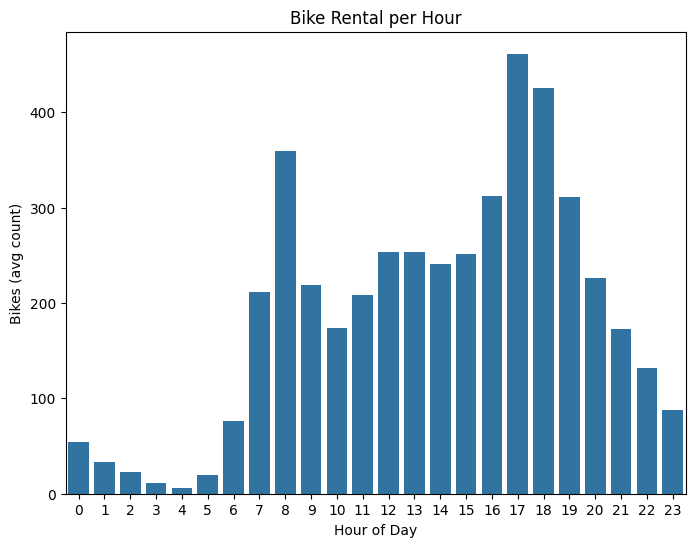

In [15]:
# Implement a bar plot of hour vs count. Are there any specific hours that are busier than others?
plt.figure(figsize= (8, 6), num= 6)

sns.barplot(data= bikes, x= 'hr', y= 'cnt', errorbar= None)

plt.title('Bike Rental per Hour')
plt.xlabel('Hour of Day') 
plt.ylabel('Bikes (avg count)')

plt.show()

Around 8:00 AM and between 5:00-7:00 PM are the busiest times of days.

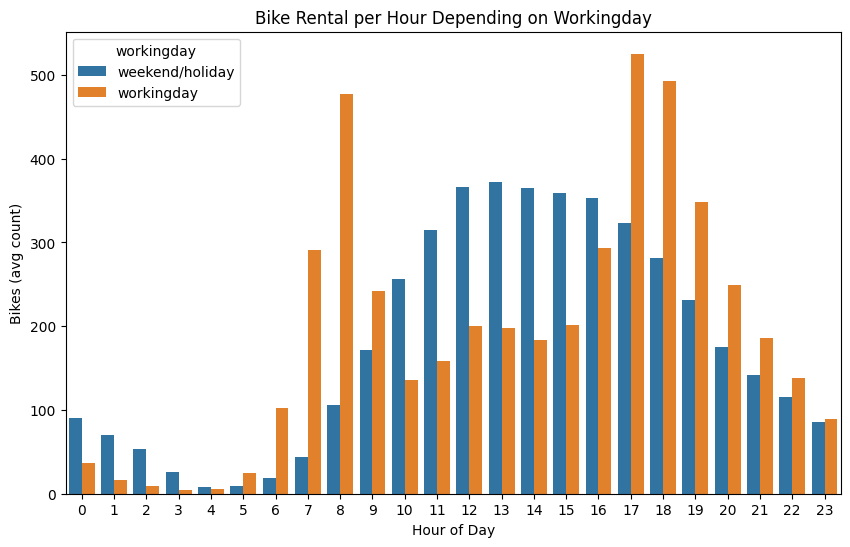

In [16]:
# Implement a bar plot of hour vs count on weekends and holidays (when workingday = 0).
# Does the hourly trend change on weekends?
plt.figure(figsize= (10, 6), num= 7)

legend_labels = ['weekend/holiday', 'workingday']

g = sns.barplot(data= bikes, x= 'hr', y= 'cnt', hue= 'workingday', errorbar= None)

plt.title('Bike Rental per Hour Depending on Workingday')
plt.xlabel('Hour of Day')
plt.ylabel('Bikes (avg count)')
for t, l in zip(g.legend_.texts, legend_labels):
    t.set_text(l)

plt.show()

The hourly trend does change on weekends. On weekends, the busiest hours are between 12:00-4:00 PM.

In [17]:
plt.close('all')

## Part 2: Data Preparation

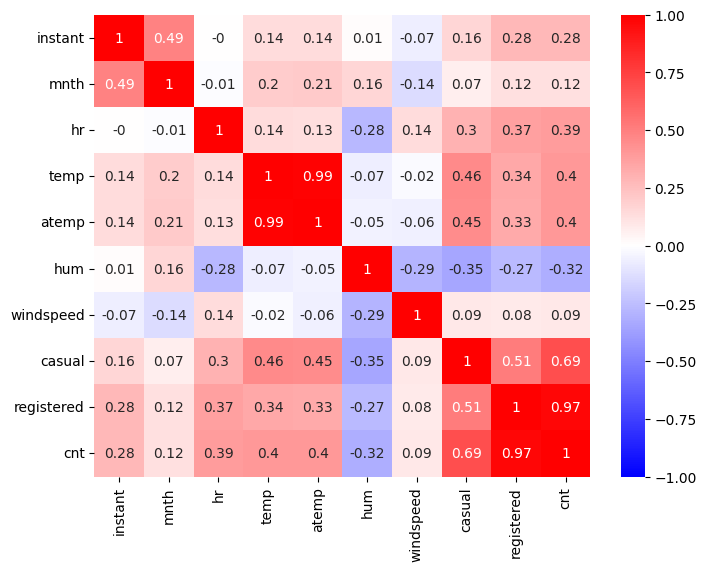

In [18]:
# Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
plt.figure(figsize= (8, 6), num= 8)
sns.heatmap(bikes.corr(numeric_only= True).round(2), annot= True, vmin= -1.0, vmax= 1.0, cmap= 'bwr')
plt.show()

Registered, casual, and count appear to be correlated together in some way. Temp and atemp appear to be almost identical.

In [19]:
# Scale the numerical features using StandardScaler()
columns= ['casual', 'registered']    # other numerical features (such as temp/atemp were not included because they were already normalized)
scaler = StandardScaler()
bikes_scaled = pd.DataFrame(scaler.fit_transform(bikes[columns]), index= bikes.index, columns= columns)
bikes_scaled.describe()

,casual,registered
count,1.737900e+04,1.737900e+04
mean,2.289567e-17,-3.924973e-17
std,1.000029e+00,1.000029e+00
min,-7.236025e-01,-1.016081e+00
25%,-6.424726e-01,-7.914407e-01
50%,-3.788002e-01,-2.562677e-01
75%,2.499570e-01,4.374750e-01
max,6.720071e+00,4.837786e+00


In [21]:
# replace the original columns in the dataframe
bikes['casual'] = bikes_scaled['casual']
bikes['registered'] = bikes_scaled['registered']
#bikes['cnt'] = bikes_scaled['cnt']
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,-0.662755,-0.930189,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,-0.561343,-0.804655,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,-0.622190,-0.837690,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,-0.662755,-0.950010,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,-0.723603,-1.009474,1


In [22]:
# Drop the following columns from your dataset: casual, registered, dteday, instant.
bikes.drop(columns= ['casual', 'registered', 'dteday', 'instant'], inplace= True)
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


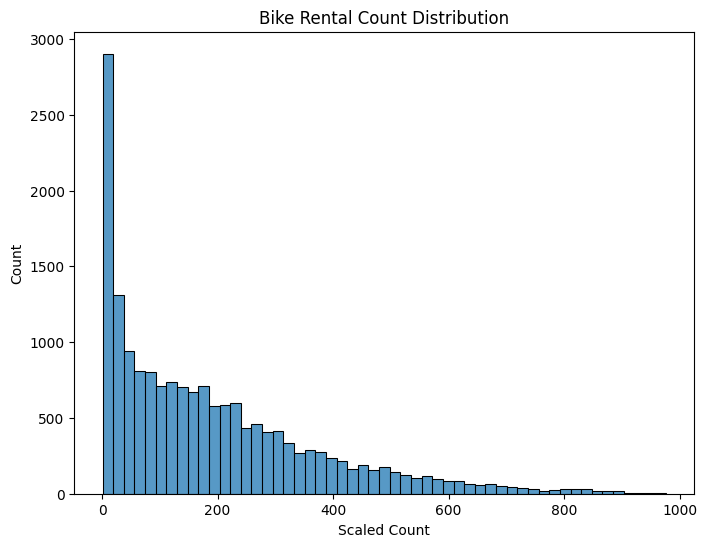

In [23]:
# Implement a histogram of the count column. What can be said based on the resulting distribution?
plt.figure(figsize= (8, 6), num= 9)

sns.histplot(data= bikes, x= 'cnt')
plt.title('Bike Rental Count Distribution')
plt.xlabel('Scaled Count')
plt.ylabel('Count')

plt.show()

This distribution is right-skewed.

In [24]:
# Implement a train/test split with a test size of 33%.
features_train, features_test, target_train, target_test = train_test_split(bikes.drop(columns= ['cnt']), bikes['cnt'],
                                                                            test_size= 0.33, random_state= 42)

In [25]:
# Implement a baseline linear regression algorithm.
lin_model = LinearRegression()
lin_model.fit(features_train, target_train)

LinearRegression()

In [26]:
# implement cross validation to get r2 and mse
lin_cv_score_r2 = cross_val_score(estimator= lin_model, X= features_train, y= target_train, scoring= 'r2')
lin_cv_score_mse = cross_val_score(estimator= lin_model, X= features_train, y= target_train, scoring= 'neg_mean_squared_error')
print(f'Avg R2 Score: {np.mean(lin_cv_score_r2)}')
print(f'MSE Score: {np.mean(-lin_cv_score_mse)}')

Avg R2 Score: 0.38506139505029086
MSE Score: 20511.172540839827


In [27]:
# calculate RMSE based on MSE
print(f'RMSE Score: {np.sqrt(np.mean(-lin_cv_score_mse))}')

RMSE Score: 143.21722152325057


In [28]:
# VERIFYING THE CODE WORKED
# yhat = lin_model.predict(features_train)

In [29]:
#d = target_train -yhat
#mse= np.mean(d**2)
#r2= 1-(sum(d**2)/sum((target_train-np.mean(target_train))**2))
#rmse= np.sqrt(mse)
#mse, r2, rmse

## Part 3: Model Training

In [30]:
# revist our dataset
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [31]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 1.0 MB


In [32]:
# Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
# Drop the original categorical columns from your source datasource
dummy_bikes = pd.get_dummies(bikes, columns= ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first= True, dtype= int)
dummy_bikes.head()

,mnth,hr,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,0.24,0.2879,0.81,0.0,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.22,0.2727,0.80,0.0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2,0.22,0.2727,0.80,0.0,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,3,0.24,0.2879,0.75,0.0,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,4,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Do a test/train split based on your new source dataset.
X_train, X_test, y_train, y_test = train_test_split(dummy_bikes.drop(columns= ['cnt']), dummy_bikes['cnt'],
                                                                            test_size= 0.33, random_state= 42)

# Implement and fit a new linear model on the new training set
lin_model_dummy = LinearRegression()
lin_model_dummy.fit(X_train, y_train)

LinearRegression()

What are the new values for R2, MSE, and RMSE?

In [34]:
# implement cross validation to get r2 and mse
lin_cvs_r2 = cross_val_score(estimator= lin_model_dummy, X= X_train, y= y_train, scoring= 'r2')
lin_cvs_mse = cross_val_score(estimator= lin_model_dummy, X= X_train, y= y_train, scoring= 'neg_mean_squared_error')
r2 = np.mean(lin_cvs_r2)
mse = np.mean(-lin_cvs_mse)

# calculate RMSE based on MSE
rmse = np.sqrt(np.mean(-lin_cvs_mse))
model_info = ['Linear Regression', r2, mse, rmse]
arr = np.reshape(model_info, (1, 4))

print('Linear Regression Model:')
print(f'R2 Score: {r2}')
print(f'MSE Score: {mse}')
print(f'RMSE Score: {rmse}')

cv_scores = pd.DataFrame(arr, columns= ['model type', 'r2', 'mse', 'rmse'])

Linear Regression Model:
R2 Score: 0.3935667722101157
MSE Score: 20228.695435685302
RMSE Score: 142.2276183998217


In [35]:
cv_scores

,model type,r2,mse,rmse
0,Linear Regression,0.3935667722101157,20228.695435685302,142.2276183998217


For implement and score requests, instantiate the algorithm and use cross_val_score or cross_validation.

In [36]:
# Implement a decision tree regressor with random_state = 0.
dec_tree = DecisionTreeRegressor(random_state= 0)

In [37]:
# Implement a RandomForestRegressor with random_state = 0 and n_estimators = 30.
rf_regr = RandomForestRegressor(n_estimators= 30, random_state= 0)

In [38]:
# Implement an SGDRegressor with max_iter = 1000 and tol = 1e-3.
sgd_reg = SGDRegressor(max_iter= 1000, tol= 1e-3, random_state= 42)

In [39]:
# Implement a Lasso Regressor with alpha = 0.1
lasso = Lasso(alpha= 0.1, random_state= 42)

In [40]:
# Implement an ElasticNetRegressor with random_state = 0.
elastic = ElasticNet(random_state= 0)

In [41]:
# Implement a RidgeRegressor with alpha = 0.5.
ridge = Ridge(alpha= 0.5, random_state= 42)

In [42]:
# Implement a BaggingRegressor.
bag_reg = BaggingRegressor(random_state= 42)

In [43]:
# fit and score all the instantiated models
models = [dec_tree, rf_regr, sgd_reg, lasso, elastic, ridge, bag_reg]

for model in models:
    model.fit(X_train, y_train)

    model_cv_r2 = cross_val_score(estimator= model, X= X_train, y= y_train, scoring= 'r2')
    model_cv_mse = cross_val_score(estimator= model, X= X_train, y= y_train, scoring= 'neg_mean_squared_error')

    r2 = np.mean(model_cv_r2)
    mse = np.mean(-model_cv_mse)
    rmse = np.sqrt(np.mean(-model_cv_mse))
    model_info = [model, r2, mse, rmse]
    #arr = np.reshape(model_info, (1, 4))

    print(f'{model}:')
    print(f'R2 Score: {r2}')
    print(f'MSE Score: {mse}')
    print(f'RMSE Score: {rmse}')
    print('\n')

    #pd.DataFrame(np.insert(cv_scores.values, values= model_info, axis= 0), columns= cv_scores.columns)
    #cv_scores.reset_index(inplace= True)
    #cv_scores = pd.concat((cv_scores.iloc[[0]], model_info), ignore_index= True)
    cv_scores.loc[len(cv_scores.index)] = model_info

cv_scores

DecisionTreeRegressor(random_state=0):
R2 Score: 0.8768560655809692
MSE Score: 4101.957338241565
RMSE Score: 64.04652479441461


RandomForestRegressor(n_estimators=30, random_state=0):
R2 Score: 0.9349395283561114
MSE Score: 2168.9316770037003
RMSE Score: 46.57179057115692


SGDRegressor(random_state=42):
R2 Score: 0.34893798343951865
MSE Score: 21734.679767614907
RMSE Score: 147.4268624356325


Lasso(alpha=0.1, random_state=42):
R2 Score: 0.3936304176557792
MSE Score: 20227.014734331617
RMSE Score: 142.22170978557253


ElasticNet(random_state=0):
R2 Score: 0.24425520756873462
MSE Score: 25223.986029332817
RMSE Score: 158.82060958620207


Ridge(alpha=0.5, random_state=42):
R2 Score: 0.39359013541537574
MSE Score: 20227.921499428754
RMSE Score: 142.2248976073766


BaggingRegressor(random_state=42):
R2 Score: 0.9285344232679332
MSE Score: 2381.2071048886874
RMSE Score: 48.7976137212537




,model type,r2,mse,rmse
0,Linear Regression,0.3935667722101157,20228.695435685302,142.2276183998217
1,DecisionTreeRegressor(random_state=0),0.876856,4101.957338,64.046525
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.93494,2168.931677,46.571791
3,SGDRegressor(random_state=42),0.348938,21734.679768,147.426862
4,"Lasso(alpha=0.1, random_state=42)",0.39363,20227.014734,142.22171
5,ElasticNet(random_state=0),0.244255,25223.986029,158.82061
6,"Ridge(alpha=0.5, random_state=42)",0.39359,20227.921499,142.224898
7,(DecisionTreeRegressor(random_state=1952926171...,0.928534,2381.207105,48.797614


In [44]:
# change the names of models at index 2 and 7 to more clearly reflect the model type
cv_scores.iloc[2, 0] = 'Random Forest'
cv_scores.iloc[7, 0] = 'Bagging Regression'
cv_scores

,model type,r2,mse,rmse
0,Linear Regression,0.3935667722101157,20228.695435685302,142.2276183998217
1,DecisionTreeRegressor(random_state=0),0.876856,4101.957338,64.046525
2,Random Forest,0.93494,2168.931677,46.571791
3,SGDRegressor(random_state=42),0.348938,21734.679768,147.426862
4,"Lasso(alpha=0.1, random_state=42)",0.39363,20227.014734,142.22171
5,ElasticNet(random_state=0),0.244255,25223.986029,158.82061
6,"Ridge(alpha=0.5, random_state=42)",0.39359,20227.921499,142.224898
7,Bagging Regression,0.928534,2381.207105,48.797614


In [45]:
# convert all scores to same datatype then sort by lowest rmse
cv_scores['rmse'] = cv_scores['rmse'].apply(pd.to_numeric)
cv_scores.sort_values(by= 'rmse', inplace= True)
cv_scores

,model type,r2,mse,rmse
2,Random Forest,0.93494,2168.931677,46.571791
7,Bagging Regression,0.928534,2381.207105,48.797614
1,DecisionTreeRegressor(random_state=0),0.876856,4101.957338,64.046525
4,"Lasso(alpha=0.1, random_state=42)",0.39363,20227.014734,142.221710
6,"Ridge(alpha=0.5, random_state=42)",0.39359,20227.921499,142.224898
0,Linear Regression,0.3935667722101157,20228.695435685302,142.227618
3,SGDRegressor(random_state=42),0.348938,21734.679768,147.426862
5,ElasticNet(random_state=0),0.244255,25223.986029,158.820610


## Part 4: Model Tuning

Take the top three performing models and implement cross-validation on them.

In [46]:
# Hint: They should be Decision Tree Regressor, RandomForest Regressor, and BaggingRegressor.

The top three performing models were indeed the Decision Tree Regressor, the RandomForest Regressor, and the BaggingRegressor.

In [47]:
# set up the parameter grid
cv_param_grid = {'random_state': [42],
              'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
             }

Execute the grid search for each of the top three models.

In [48]:
# grid search for decision tree
dt_grid_search = GridSearchCV(estimator= dec_tree,
                              param_grid= cv_param_grid,
                              cv= 5,
                              verbose = 1,
                              scoring= 'neg_mean_squared_error')

dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'random_state': [42]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
rf_grid_search = GridSearchCV(estimator= rf_regr,
                              param_grid= cv_param_grid,
                              cv= 5,
                              verbose = 1,
                              scoring= 'neg_mean_squared_error')

rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=30, random_state=0),
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'random_state': [42]},
             scoring='neg_mean_squared_error', verbose=1)

In [50]:
br_grid_search = GridSearchCV(estimator= bag_reg,
                              param_grid= cv_param_grid,
                              cv= 5,
                              verbose = 1,
                              scoring= 'neg_mean_squared_error')

br_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42),
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'random_state': [42]},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
# print the estimator, its best resulting parameters, and the best resulting score
print(f'Best Decision Tree estimator parameters: {dt_grid_search.best_params_}')
print(f'Best RMSE Score: {np.sqrt(-dt_grid_search.best_score_)}')
print('\n')
print(f'Best Random Forrest estimator parameters: {rf_grid_search.best_params_}')
print(f'Best RMSE Score: {np.sqrt(-rf_grid_search.best_score_)}')
print('\n')
print(f'Best Bagging estimator parameters: {br_grid_search.best_params_}')
print(f'Best RMSE Score: {np.sqrt(-br_grid_search.best_score_)}')
print('\n')

Best Decision Tree estimator parameters: {'max_features': 1.0, 'random_state': 42}
Best RMSE Score: 63.79719832847778


Best Random Forrest estimator parameters: {'max_features': 0.8, 'random_state': 42}
Best RMSE Score: 46.267210631169874


Best Bagging estimator parameters: {'max_features': 1.0, 'random_state': 42}
Best RMSE Score: 48.7976137212537




Take your top performing model (mine was the RandomForestRegressor) and do a randomized search cv with 20 iterations and three folds.
- I found it is best to set your n_jobs = (# of cpu's you have - 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
- Your param distributions should include the following:
  - Boostrap: true, false
  - Max_depth: 10-110, number of bins 11
  - Max_features: auto, sqrt
  - Min_samples_split: 2, 5, 10
  - Min_samples_leaf: 1, 2, 4
  - N_estimators: 200-2000, number of bins 10

In [52]:
# set up the parameter grid
rand_param_grid = {'bootstrap': [True, False],
                   'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                   'max_features': [1.0, 'sqrt'],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4],
                   'n_estimators': [int(x) for x in np.linspace(200, 2000, num = 10)],
                  }

# set up randomized search
rand_grid_search = RandomizedSearchCV(estimator= rf_regr,
                                      param_distributions= rand_param_grid,
                                      n_iter= 20,
                                      n_jobs= 1,
                                      cv= 3,
                                      verbose = 1,
                                      scoring= 'neg_mean_squared_error',
                                      random_state= 42,
                                     )

# evaluate randomized grid search
rand_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=30,
                                                   random_state=0),
                   n_iter=20, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
RandomForestRegressor()

Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.

In [53]:
best_rf_model = rand_grid_search.best_estimator_

brf_cv_r2 = cross_val_score(estimator= best_rf_model, X= X_train, y= y_train, scoring= 'r2')
brf_cv_mse = cross_val_score(estimator= best_rf_model, X= X_train, y= y_train, scoring= 'neg_mean_squared_error')

r2 = np.mean(brf_cv_r2)
mse = np.mean(-brf_cv_mse)
rmse = np.sqrt(np.mean(-brf_cv_mse))

print('Best Random Forest Regressor Model:')
print('\n')
print(f'R2 Score: {r2}')
print(f'MSE Score: {mse}')
print(f'RMSE Score: {rmse}')
print('\n')

Best Random Forest Regressor Model:


R2 Score: 0.9363922826448059
MSE Score: 2120.4482341158773
RMSE Score: 46.04832498708153




In [54]:
print('Best Random Forest Regressor Model Parameters:')
print(f'{rand_grid_search.best_params_}')

Best Random Forest Regressor Model Parameters:
{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 100, 'bootstrap': True}


Finally, run predictions on your test set with this model, and see how your r2 score and rmse look.

In [55]:
# make predictions
best_rf_preds = best_rf_model.predict(X_test)

In [56]:
# calculate RMSE on test set
np.sqrt(mean_squared_error(y_test, best_rf_preds))

42.34822021629196

The RMSE is lower on the test set than on the training set.